In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

%matplotlib inline
sns.set(font_scale=2)

In [2]:
df=pd.read_csv('Data/Cleaned Data.csv', index_col=0)
df.head()

Subject Age Group  Subject ID Stop Resolution  Officer Gender  \
0              26 - 35           0       No Action               1   
1218            1 - 17           0       No Action               1   
1598            1 - 17           0          Arrest               1   
1599            1 - 17           0       No Action               0   
1600            1 - 17           0       No Action               1   

       Officer Race            Subject Perceived Race  \
0             White                             Asian   
1218          White                             White   
1598          White  American Indian or Alaska Native   
1599  Not Specified                           Unknown   
1600          White         Black or African American   

     Subject Perceived Gender Call Type Precinct  Actionable Stop  Weapon  \
0                        Male   No Call  Unknown              0.0     0.0   
1218                   Female   No Call  Unknown              0.0     0.0   
1598                     Male   No Call     East              1.0     0.0   
1599                     Male   No Call  Unknown              0.0     0.0   
1600                     Male   No Call  Unknown              0.0     0.0   

     Officer Age Group Day of Week  Year      Month  
0                Gen X      Friday  2015      April  
1218         Millenial      Sunday  2015        May  
1598         Millenial      Sunday  2015  September  
1599         Millenial      Sunday  2015      April  
1600             Gen X      Sunday  2015      April

First, just to get a high view look at the data, I will graph each feature against the target variable , Stop Resolution.

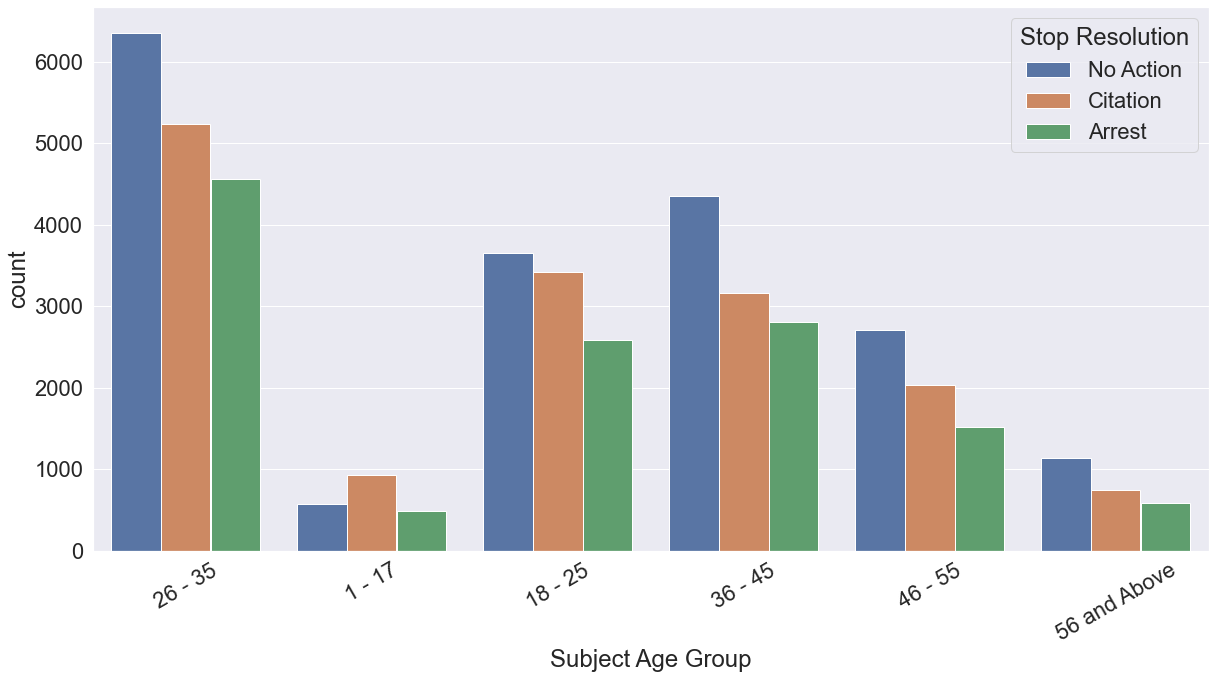

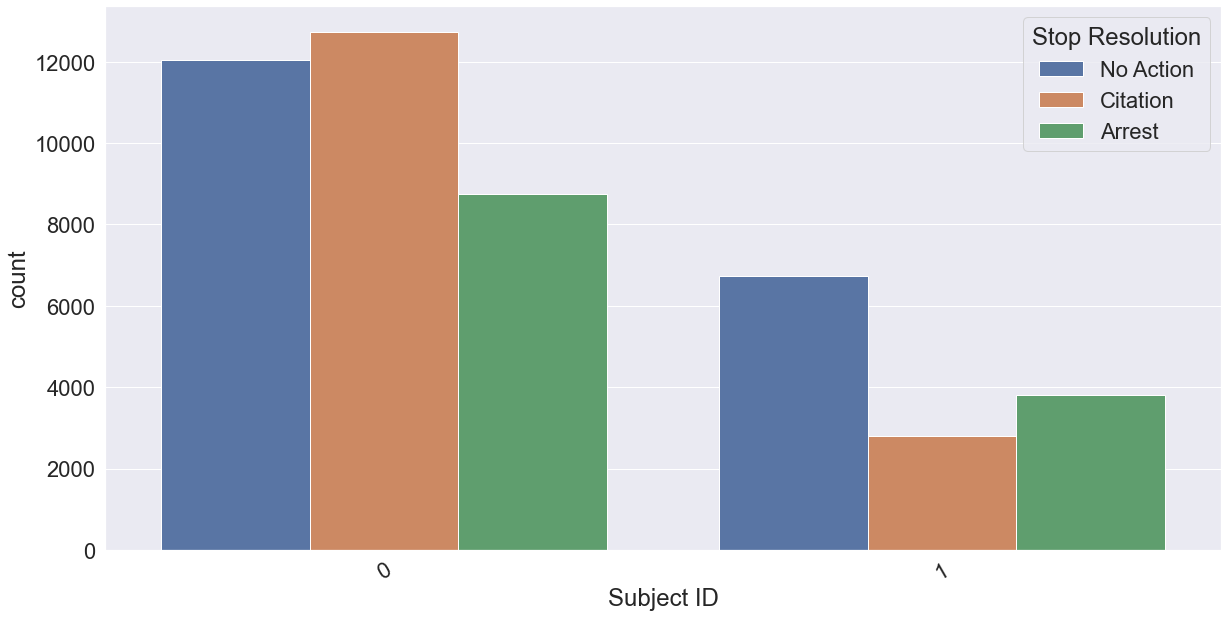

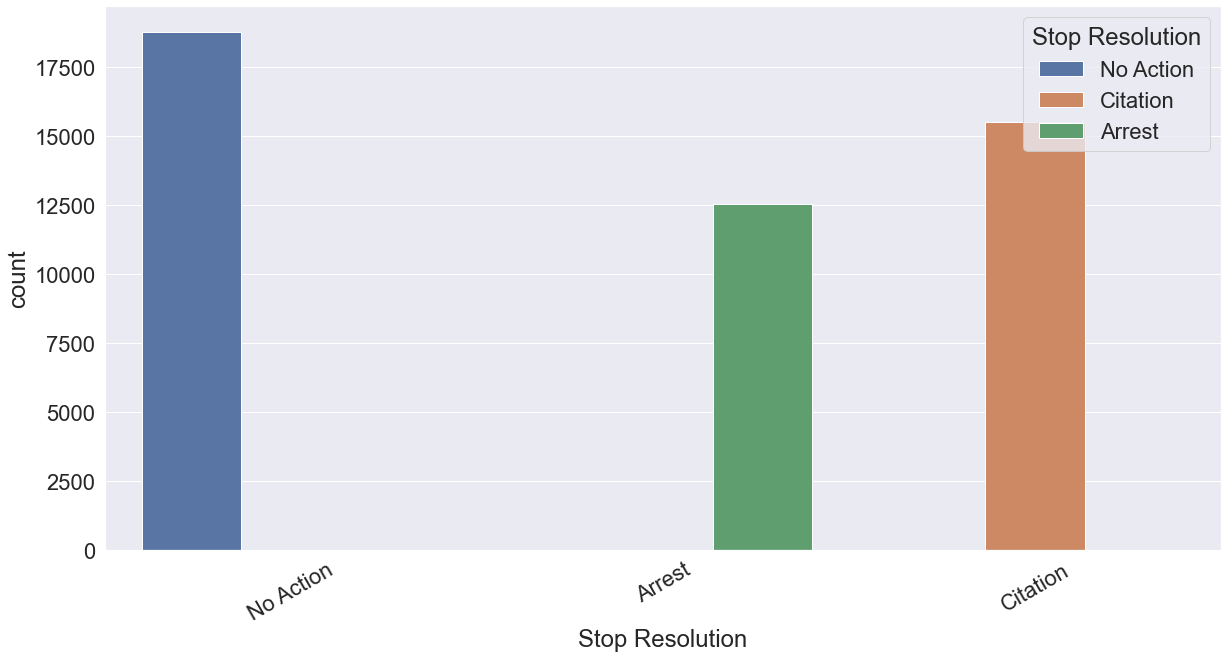

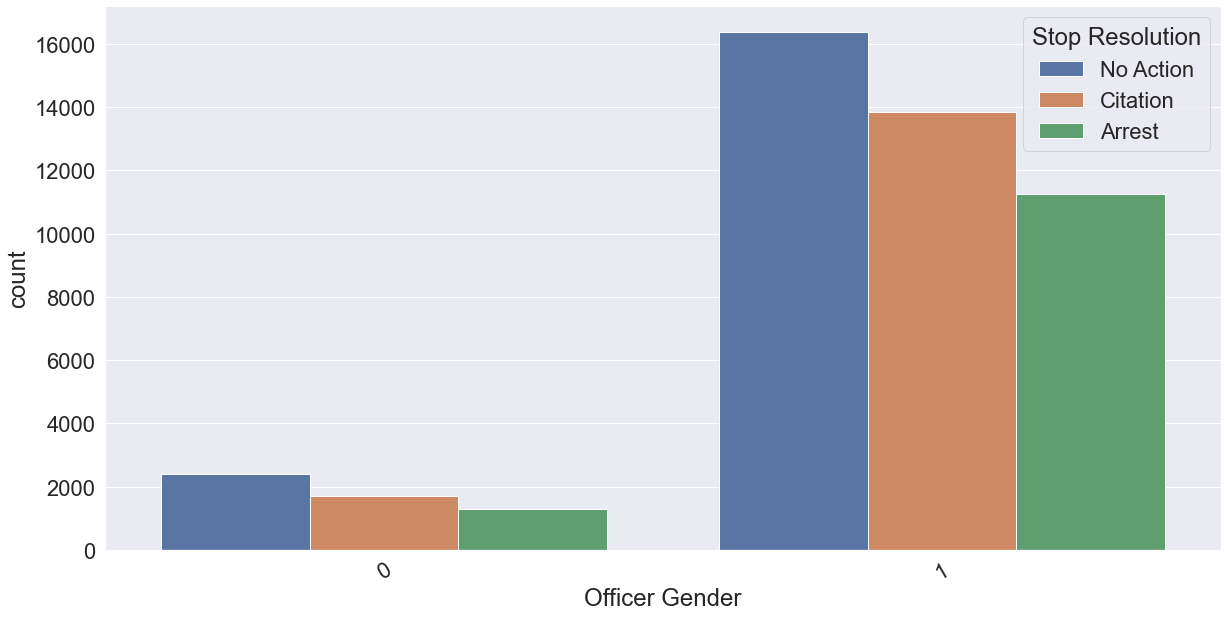

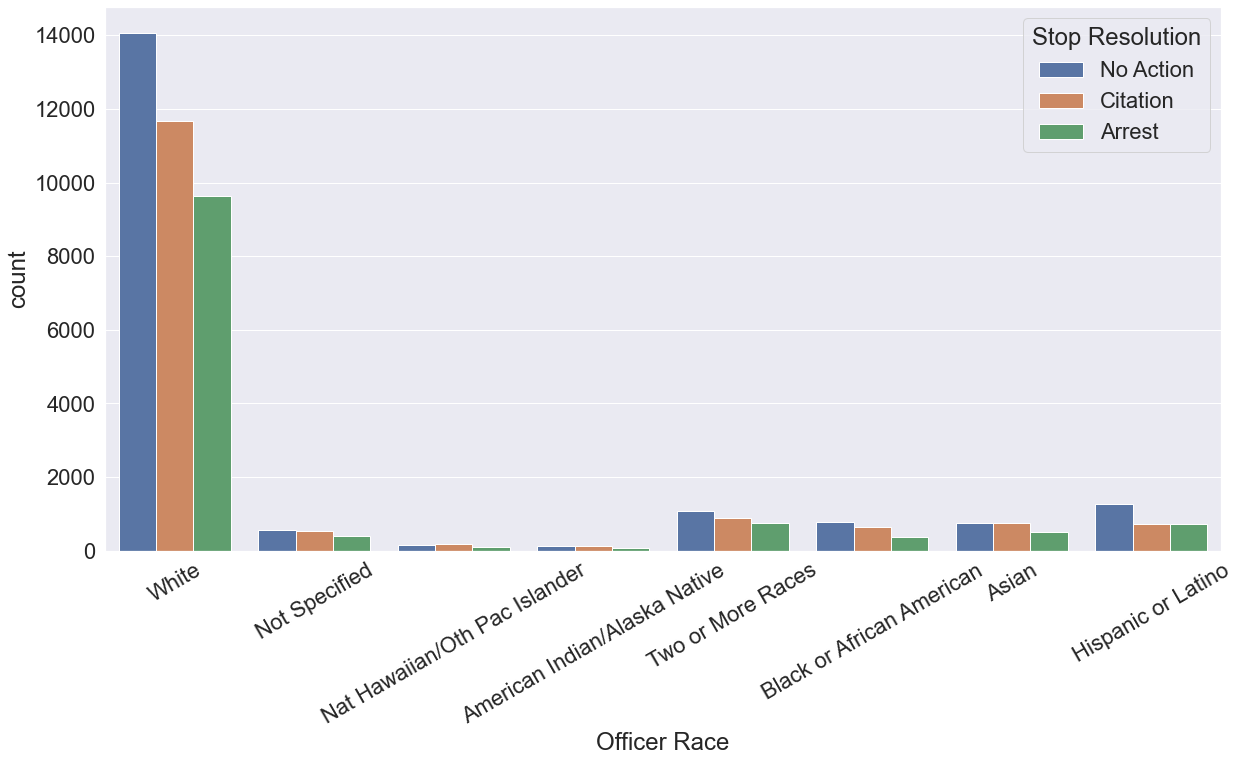

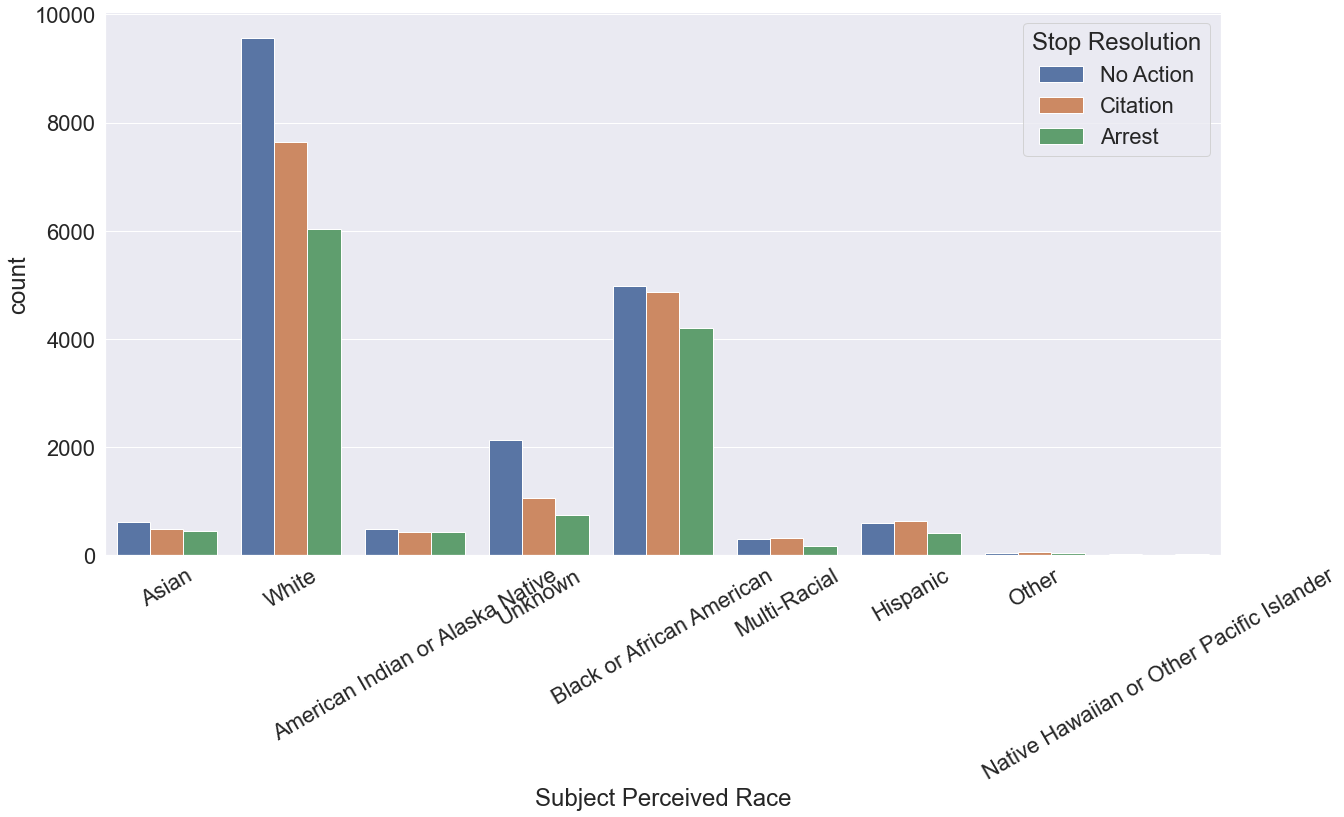

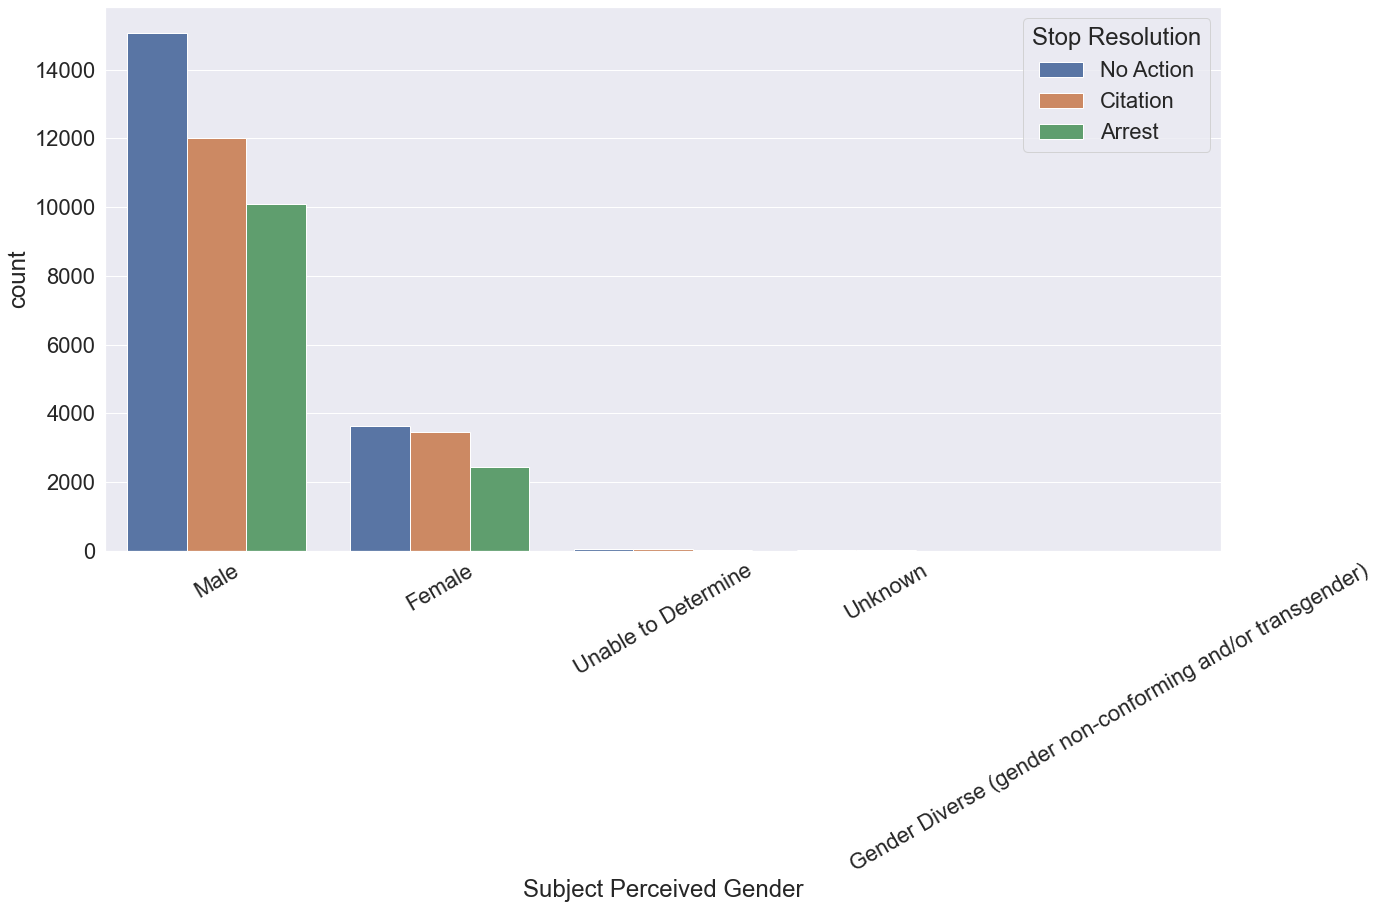

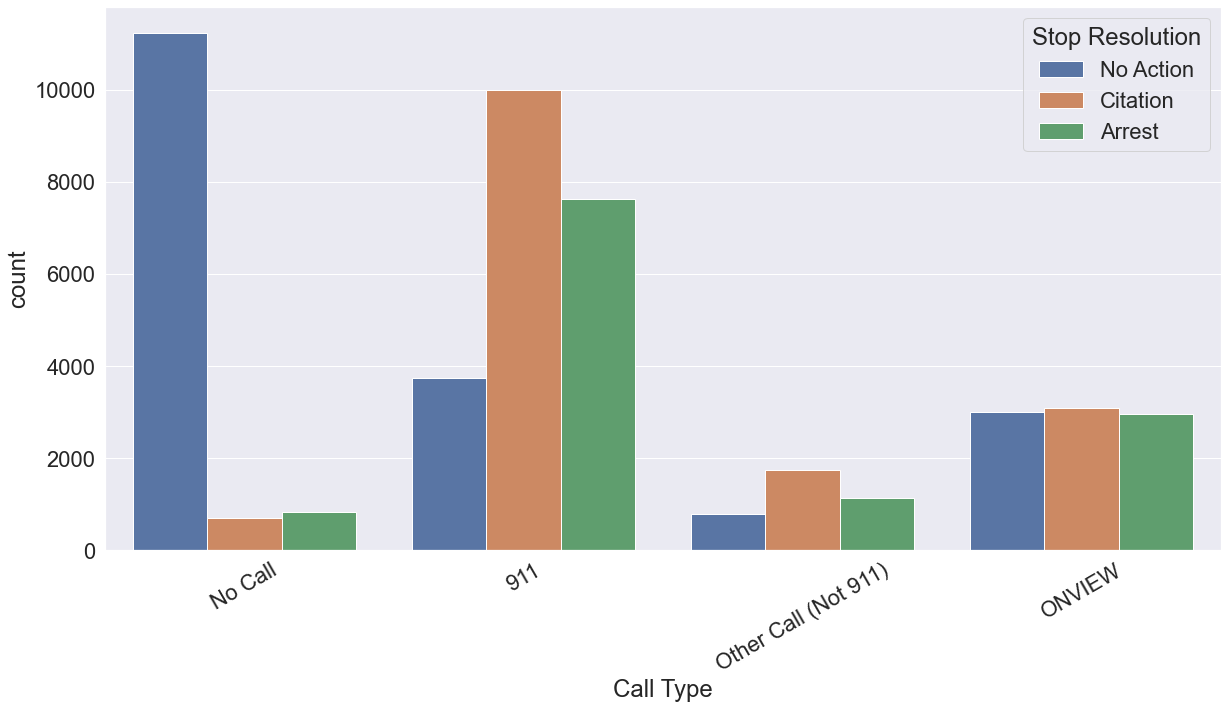

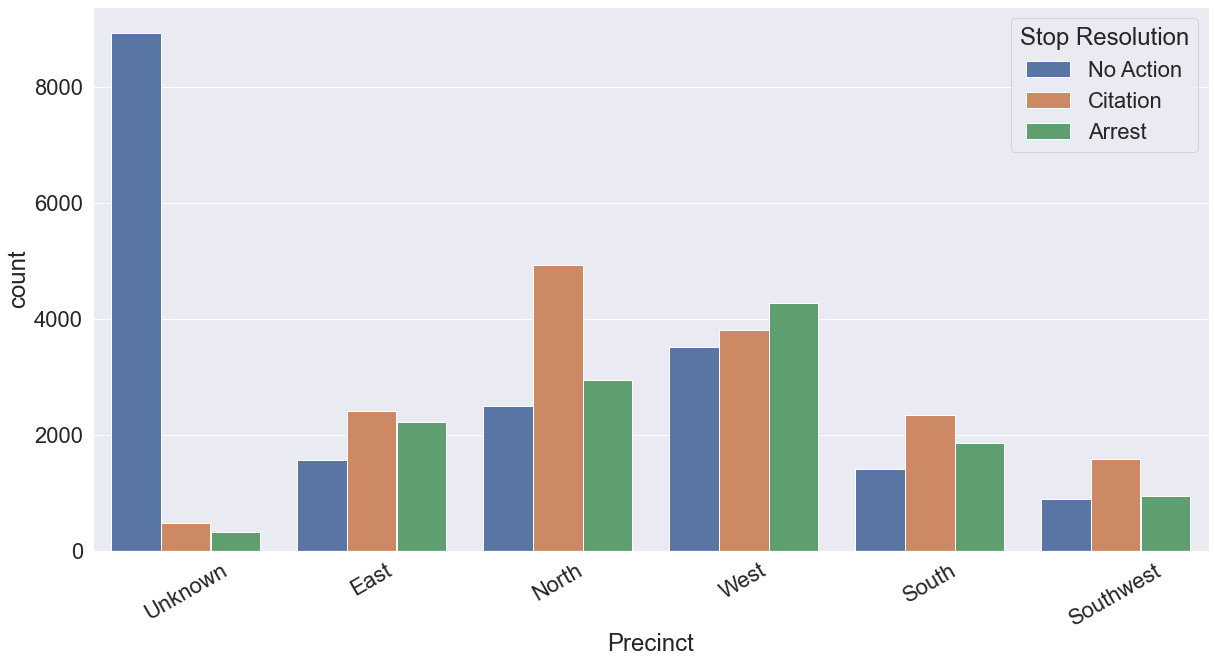

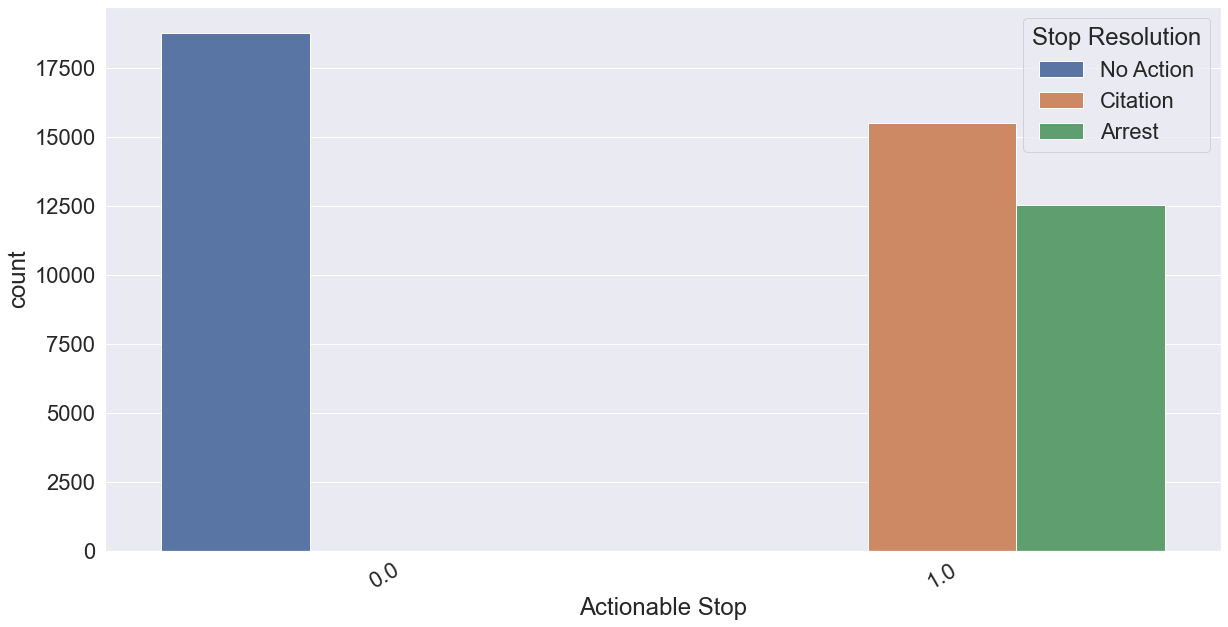

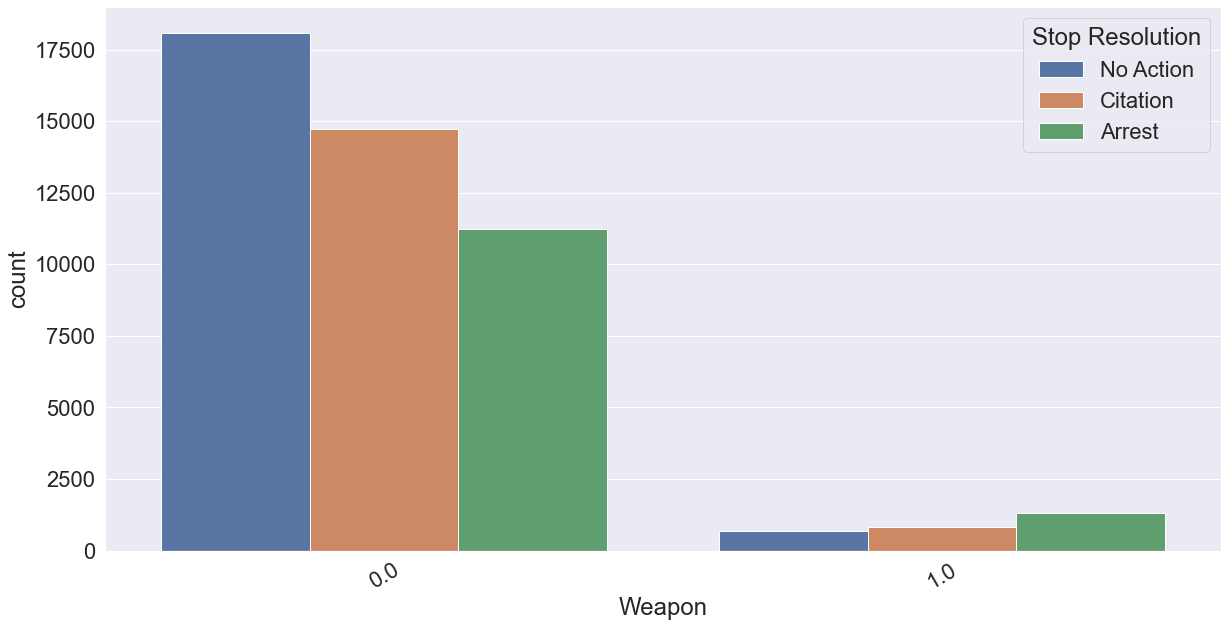

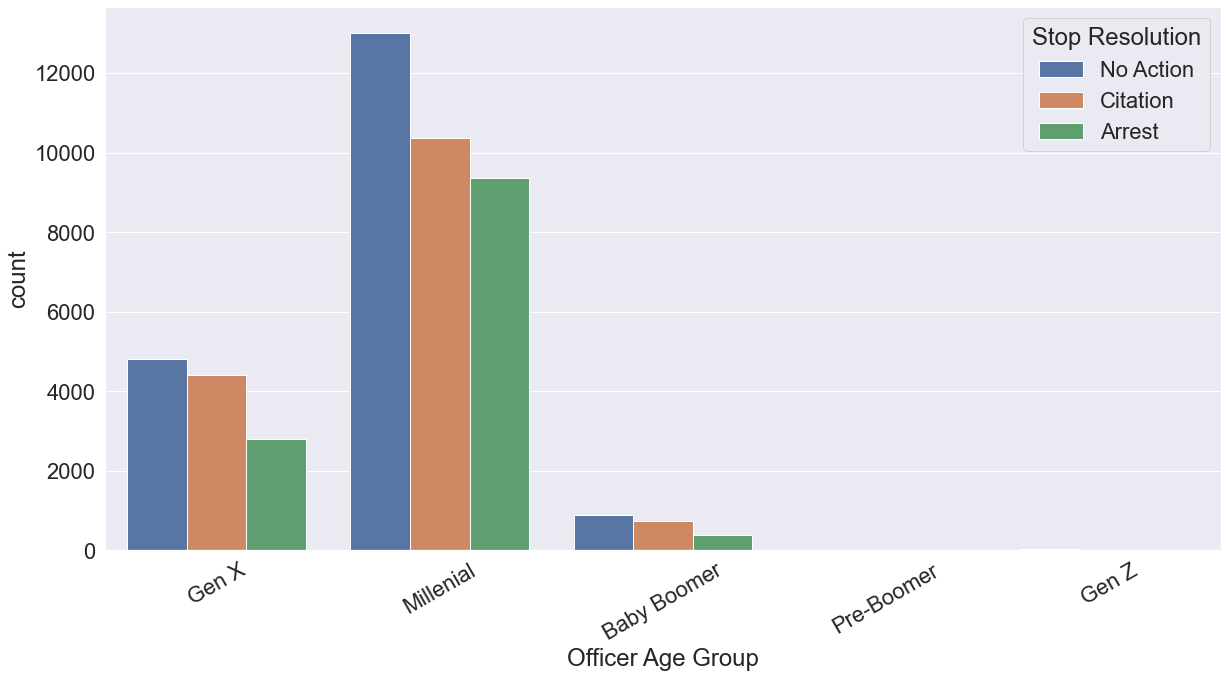

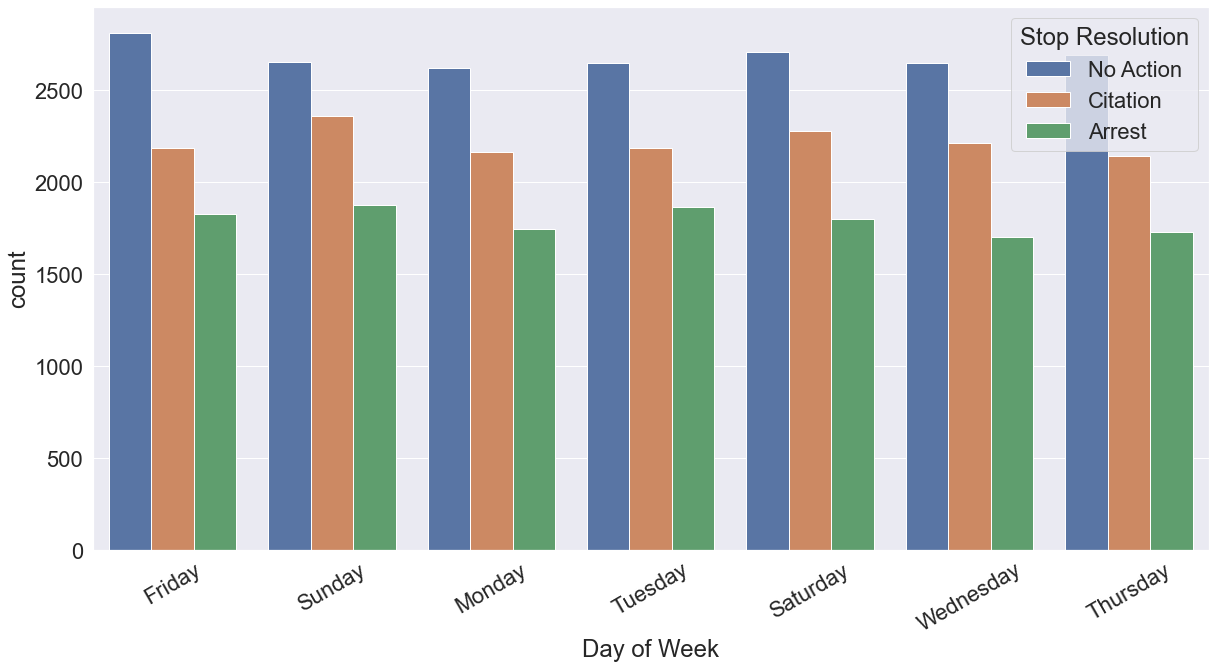

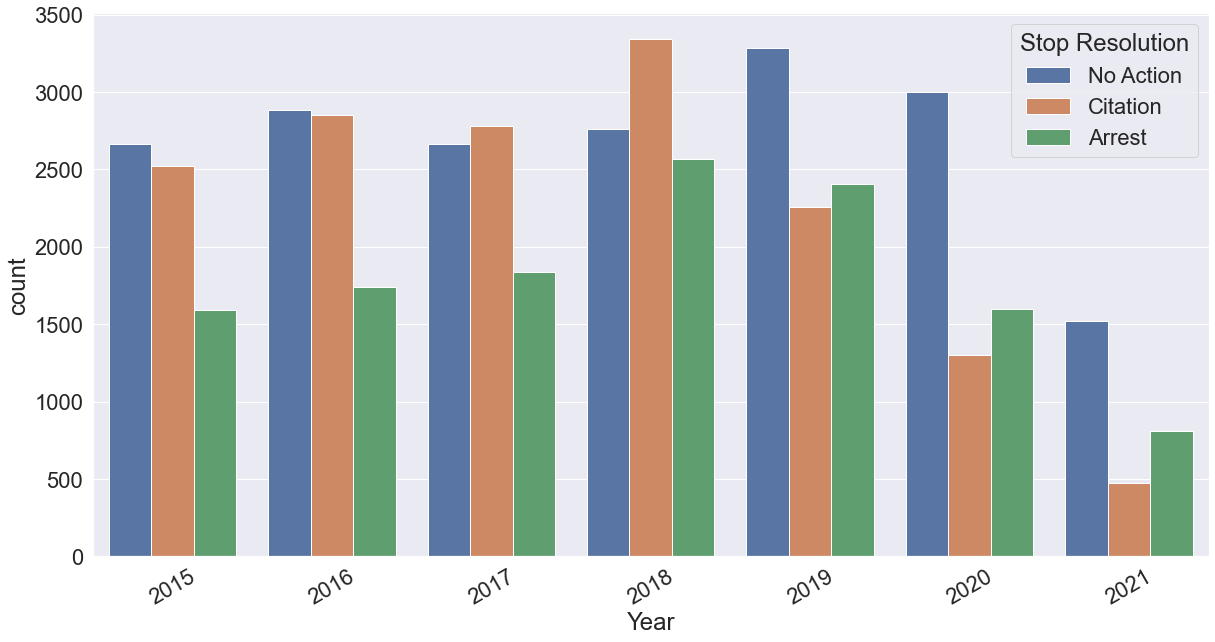

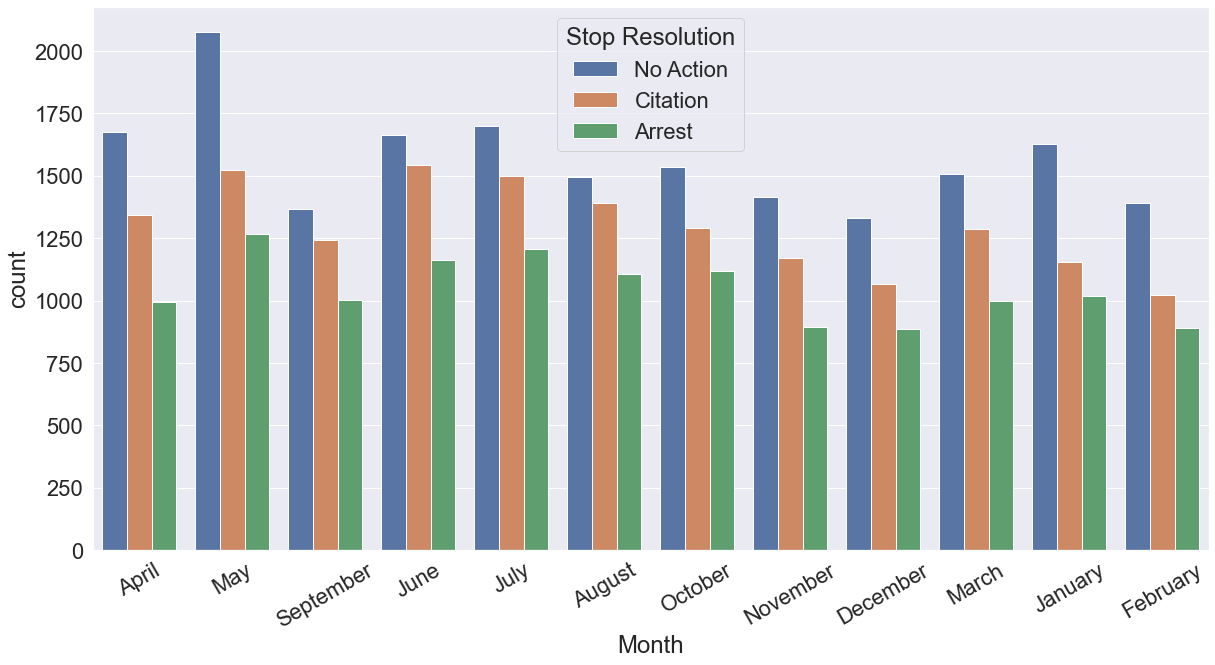

In [3]:
order = ['No Action', 'Citation', 'Arrest']

for column in df:
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.countplot(data=df, x=column, hue='Stop Resolution', hue_order=order)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
    plt.show()

There are a few interesting trends to be seen here. I'm interested first in the differences from year to year -- it seems like there is a decline in the proportion of citations being issued beginning in 2019, along with a matching uptick in no action stops. This gulf gets wider in 2020, and I am curious to look at year-by-year trends to see how 2020 correlates with the events of that year.

## Impact of COVID-19, CHAZ/CHOP and George Floyd Protests

I am curious to see if the major protests against injustice in policing that occurred in June 2020 had an impact on Terry Stops, and/or if the COVID-19 pandemic had a noticable impact on stops.

In [4]:
#Separate data by year
df_2019 = df.loc[df['Year']==2019]
df_2020 = df.loc[df['Year']==2020]
df_2021 = df.loc[df['Year']==2021]

months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']

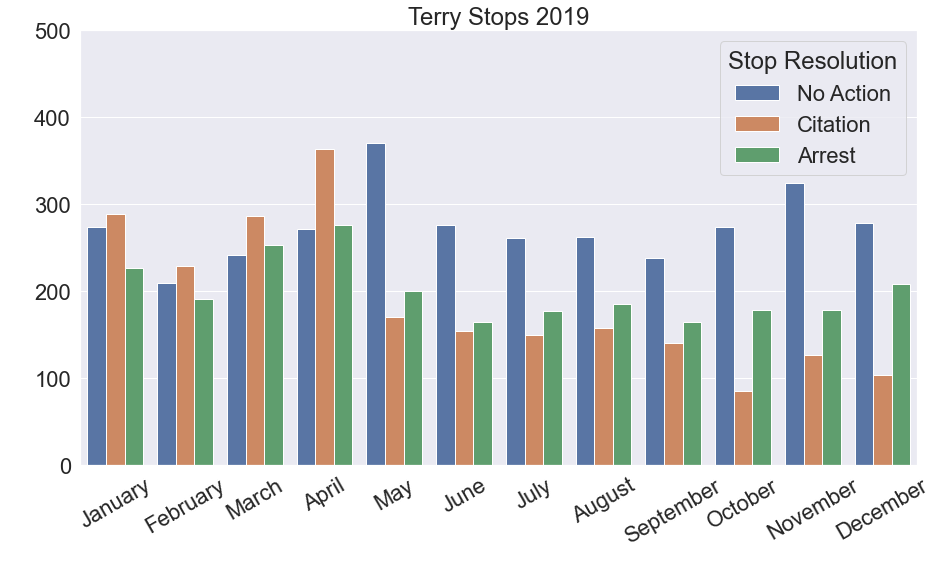

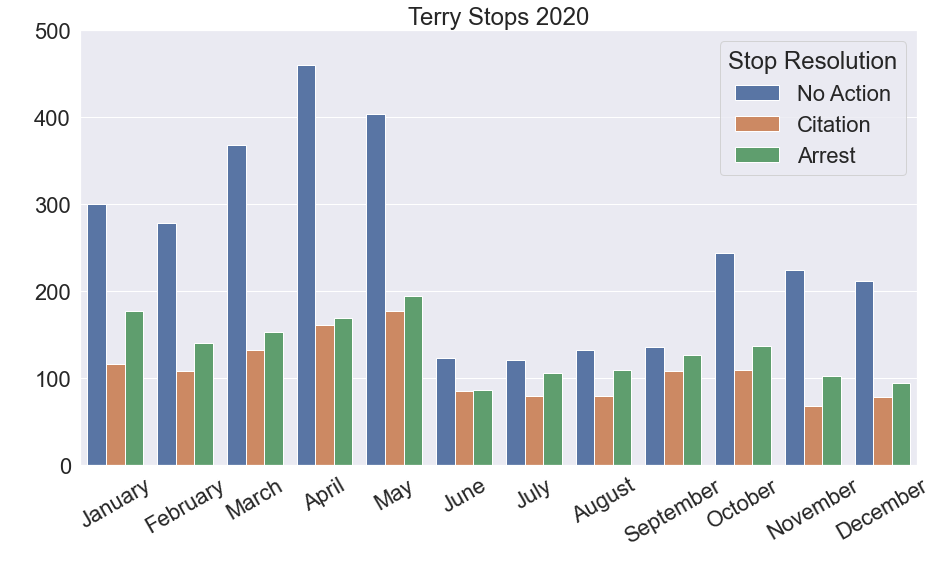

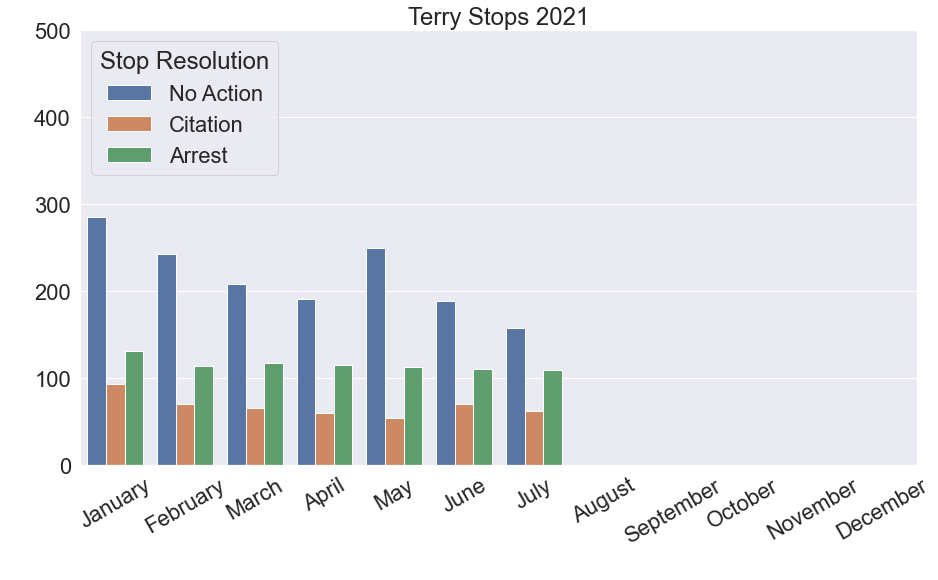

In [5]:
sns.set(font_scale=2)

fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=df_2019, x='Month', hue='Stop Resolution', order=months, hue_order=order)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set(ylim=(0, 500))
ax.set_title('Terry Stops 2019')
ax.set_ylabel(' ')
ax.set_xlabel(' ')
plt.show()

fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=df_2020, x='Month', hue='Stop Resolution', order=months, hue_order=order)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set(ylim=(0, 500))
ax.set_title('Terry Stops 2020')
ax.set_ylabel(' ')
ax.set_xlabel(' ')
plt.show();

fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=df_2021, x='Month', hue='Stop Resolution', order=months, hue_order=order)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set(ylim=(0, 500))
ax.set_title('Terry Stops 2021')
ax.set_ylabel(' ')
ax.set_xlabel(' ')
plt.show();

Interestingly, the first noticeable change is a major drop in the proportion of arrests beginning in May 2019. Further research would be required to determine what factors may contribute to this change. 
Beginning in March of 2020, there is a major spike in Terry Stops that do not result in citation or arrest, which correlates with the strict "Shelter in Place" orders that were in affect at that time due to the pandemic.
We also see an extreme drop in all Terry Stop activity beginning in June 2020, which correlates with major protests against injustice in policing and the beginning of CHAZ/CHOP.
However, in the fall of 2020, no action stops begin to pick back up, though the relative proportion of arrests and citations remains low. This trend continues into 2021.

## Racial Demographics

This naturally leads to an inquiry into whether the critiques levelled against the police are supported by the data in front of us. We can illustrate that by graphing the racial breakdown of Terry Stop subjects against the demographics of the city of Seattle at large. If there is no bias in policing, we would expect that the distribution of Terry Stop subjects race would closely resemble the entire city.
(Seattle race demographics are taken from [census.gov](https://www.census.gov/quickfacts/seattlecitywashington).

In [6]:
#racial demographics in Seattle (percentages)
seattle_demographics = {'White': 67.3,
                        'Asian': 15.4,
                        'Black or African American': 7.3,
                        'Multi-Racial': 6.9,
                        'Hispanic': 6.7,
                        'American Indian or Alaska Native': 0.5,
                        'Native Hawaiian or Other Pacific Islander': 0.3,
                       }

In [7]:
data = df['Subject Perceived Race'].value_counts()
data

White                                        23254
Black or African American                    14054
Unknown                                       3951
Hispanic                                      1659
Asian                                         1555
American Indian or Alaska Native              1365
Multi-Racial                                   801
Other                                          150
Native Hawaiian or Other Pacific Islander       67
Name: Subject Perceived Race, dtype: int64

In [8]:
race_df = data.to_frame()
race_df['stop subjects'] = race_df.apply(lambda x: (x/race_df['Subject Perceived Race'].sum())*100)
race_df['demographics'] = [67.3, 7.3, 0, 6.7, 15.4, 0.5, 6.9, 0, 0.3]

In [9]:
fig = go.Figure(data=[
    go.Bar(name='Percent of Terry Stops', x=race_df.index, y=race_df['stop subjects']),
    go.Bar(name='Seattle Demographics', x=race_df.index, y=race_df['demographics']),
])
fig.update_layout(barmode='group')

This graph shows that white people are under-represented as Terry Stop subjects and black people are majorly over-represented.

## Stops by Precinct

The final thing I am curious about before modelling is whether the data demonstrates a pattern of over-policing in low income communities and communities of color, by graphing Stop Resolution against precinct to see if there is a correlation.

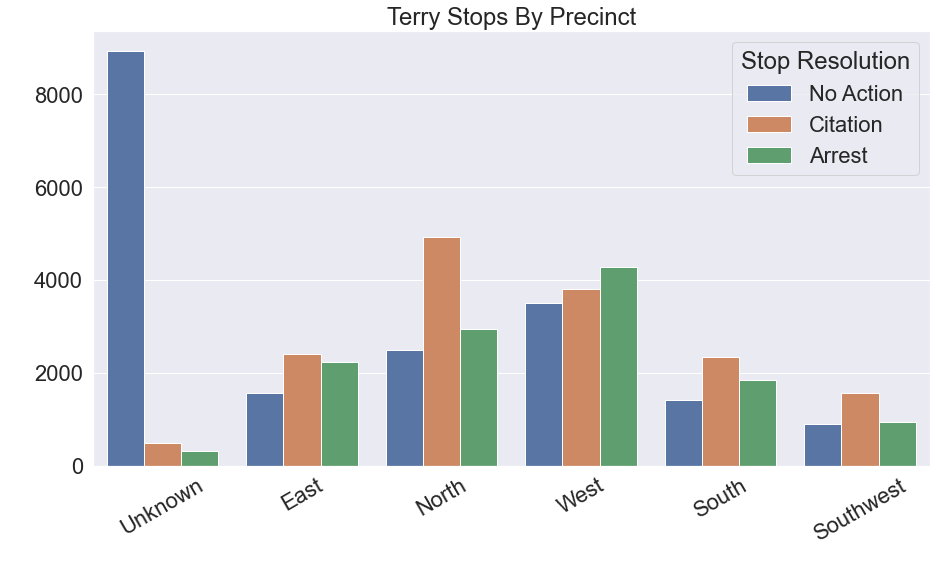

In [10]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=df, x='Precinct', hue='Stop Resolution', hue_order=order)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_title('Terry Stops By Precinct')
ax.set_ylabel(' ')
ax.set_xlabel(' ')
plt.show()

There are an extremely high number of calls where the officer's precinct wasn't noted. Without more data, it's hard to know what the reason behind that is. 
Of the stops with precinct data available, there actually appears to be a lower percentage of stops made in the South precinct, which is where more low income communities and communities of color are located. High proportion of stops in the west precinct correlate with that being where downtown Seattle is located, and the high number of citations in the North precinct likely correlates with traffic stops along I-5.

## Post-Modelling EDA

I am curious to look a bit closer at Call Type and Subject ID because those features were the most important for all of my models. Specifically, I am curious if there is a relationship between either of those variables and race.

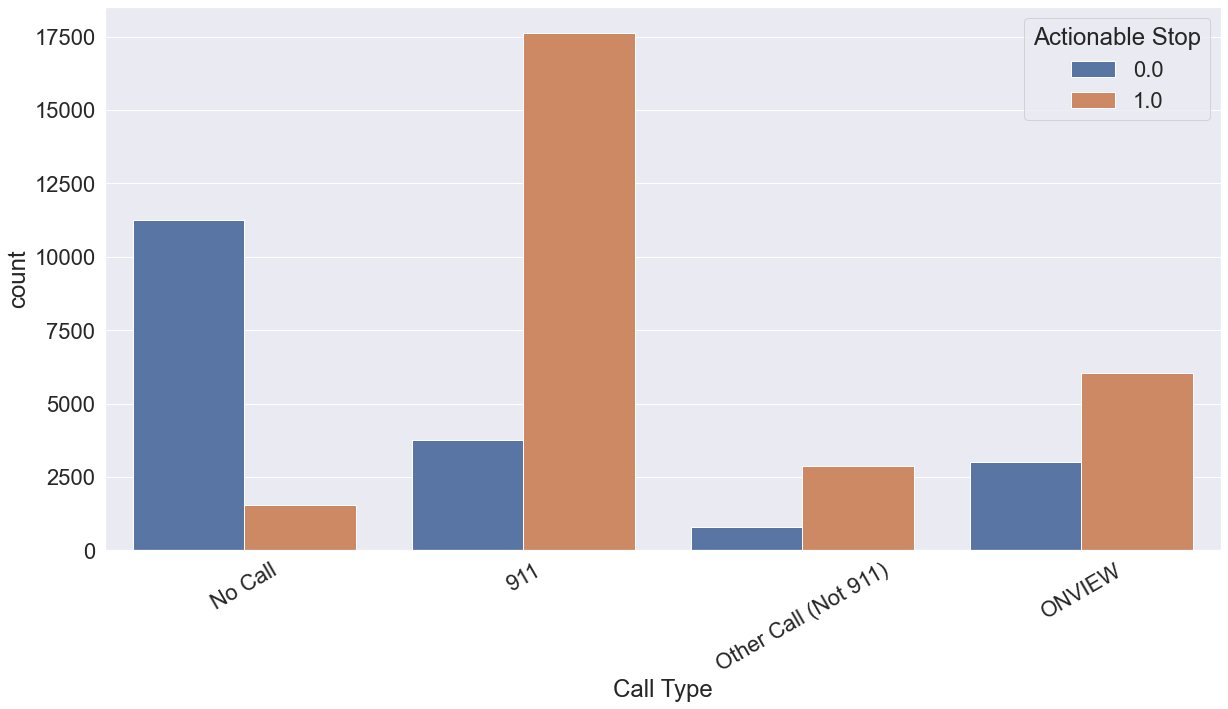

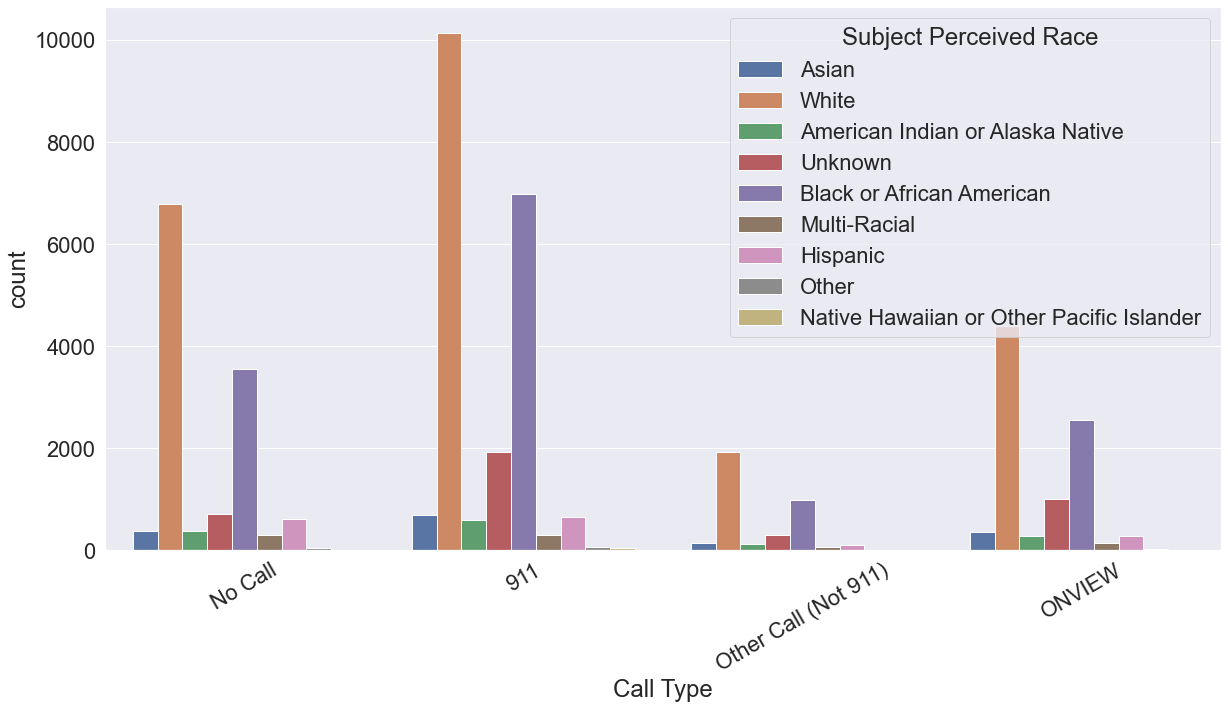

In [11]:
#plot the relationship between Call Type and Actionable Stop
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(data=df, x='Call Type', hue='Actionable Stop')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show();

#plot the relationship between Call Type and Subject Perceived Race
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(data=df, x='Call Type', hue='Subject Perceived Race')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30);

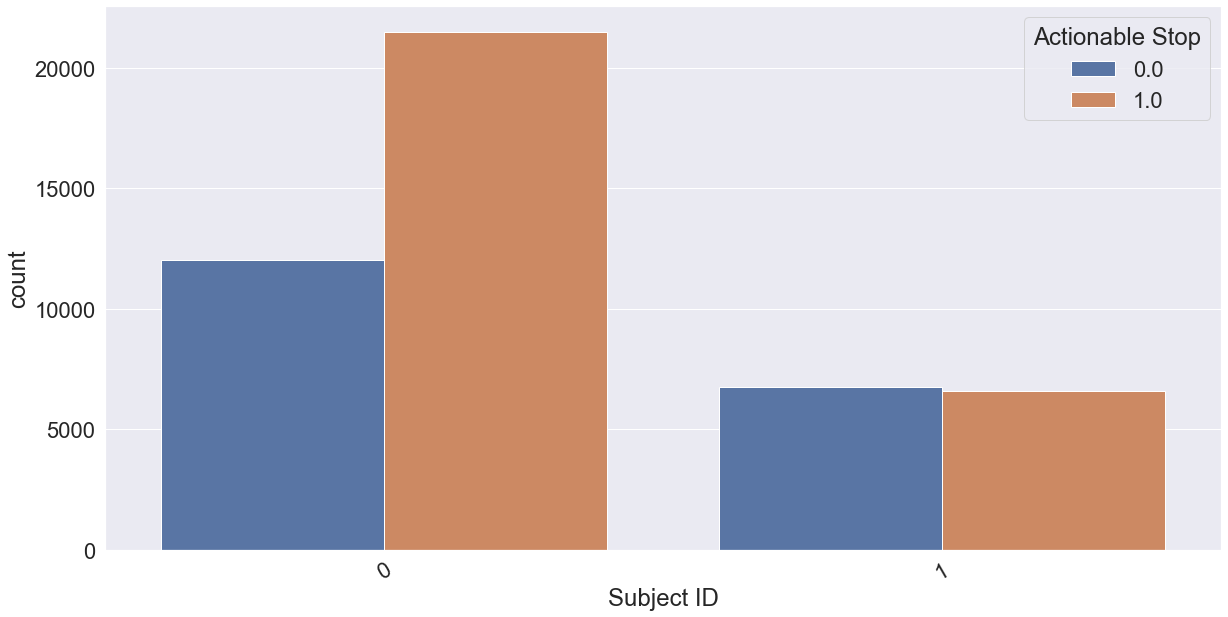

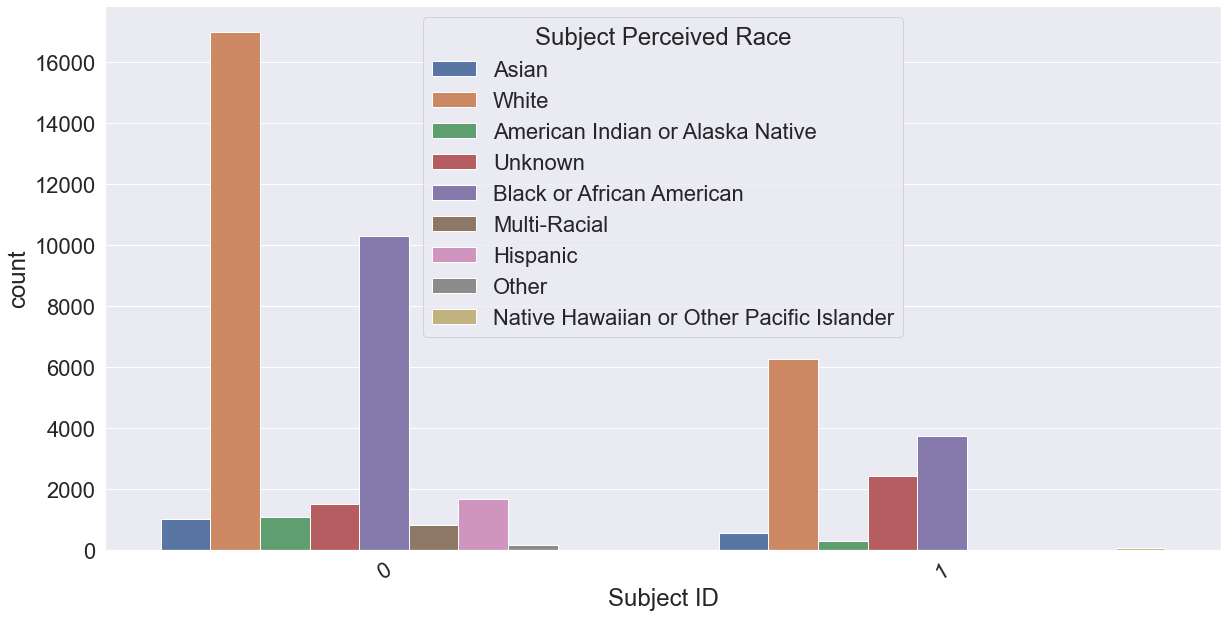

In [12]:
#plot the relationship between Subject ID and Actionable Stop
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(data=df, x='Subject ID', hue='Actionable Stop')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30);

#plot the relationship between Subject ID and Race
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(data=df, x='Subject ID', hue='Subject Perceived Race')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30);

Neither of these variables displays a strong relationship with race. At this point, my conclusion is that there is some bias evident in deciding who gets stopped, but once the stop has occurred race is not a strong predictor of outcome.